<a href="https://colab.research.google.com/github/Singati2/AI_Science_Medicine/blob/main/Random_Walk_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 92746202.64it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 112266630.05it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25547232.82it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19990061.67it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [24]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [25]:
X.shape

(60000, 1, 28, 28)

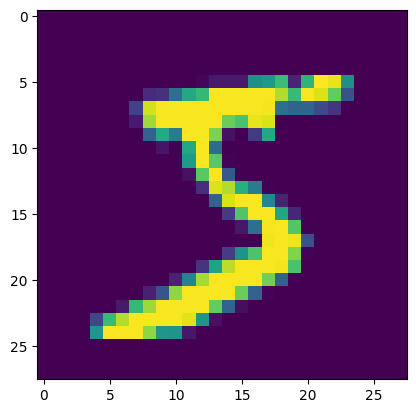

In [26]:
plt.imshow(X[0,0,:,:],cmap='viridis')

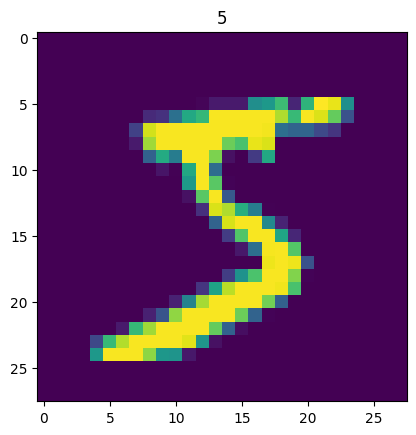

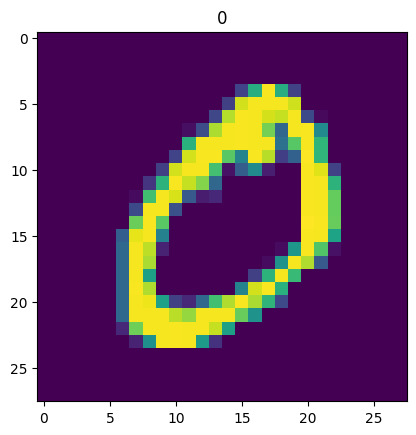

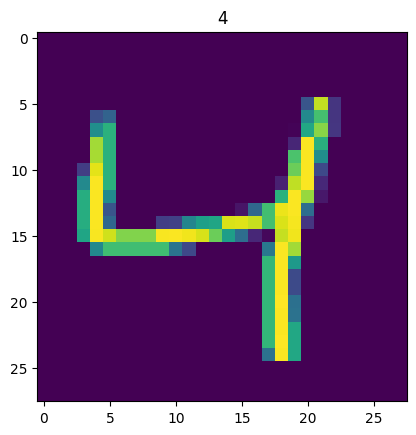

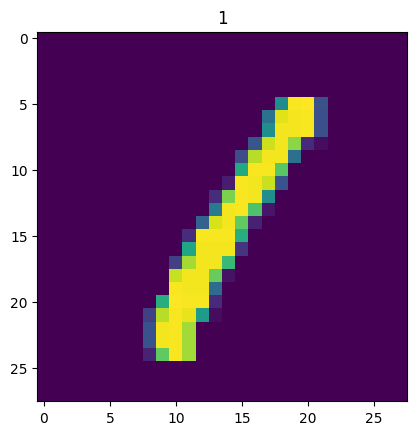

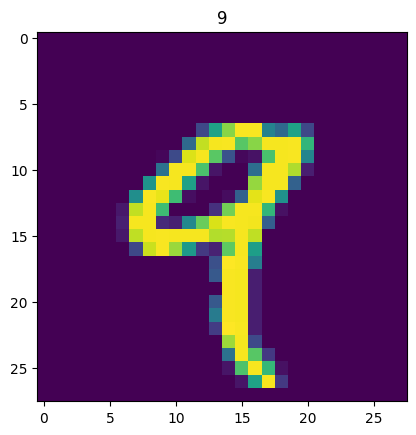

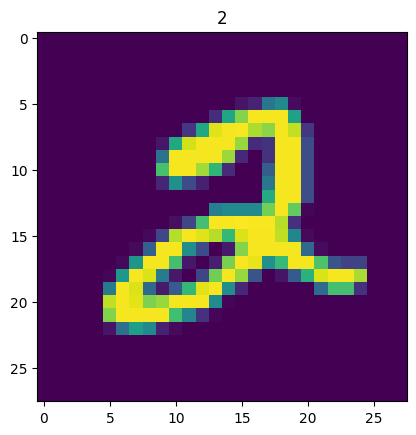

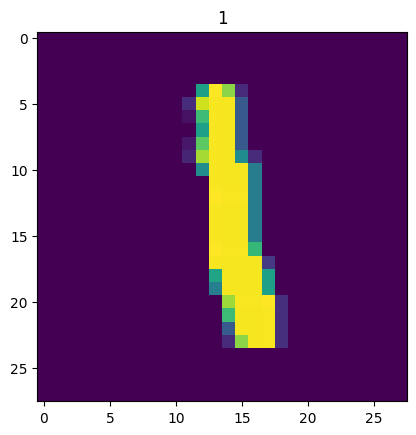

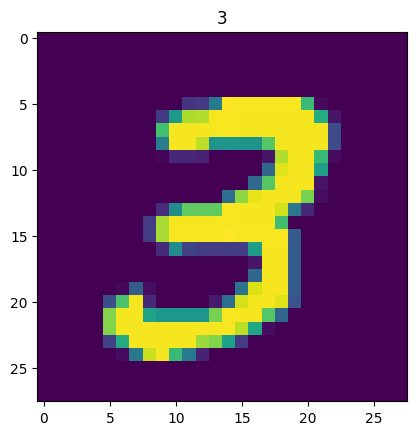

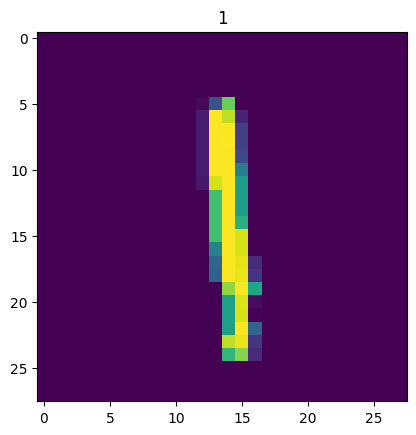

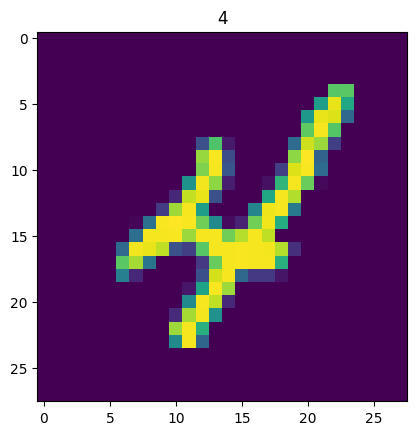

In [8]:
for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='viridis')
    plt.title(str(Y[i]))
    plt.show()

In [11]:
Y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [12]:
X[0,0,:,:].shape

(28, 28)

In [13]:
x = X[0,0,:,:].flatten()

In [14]:
x.shape

(784,)

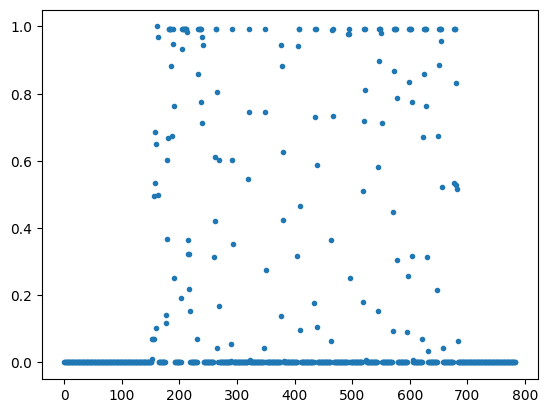

In [15]:
plt.plot(x,'.')

In [16]:
Y[0]

5

In [17]:
x = x[:,None]

In [18]:
x.shape

(784, 1)

In [19]:
m = np.random.standard_normal((10,784))

In [20]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
y = m@x # @ mean matmul 

In [ ]:
y = np.matmul(m,x)

In [ ]:
y.shape

(10, 1)

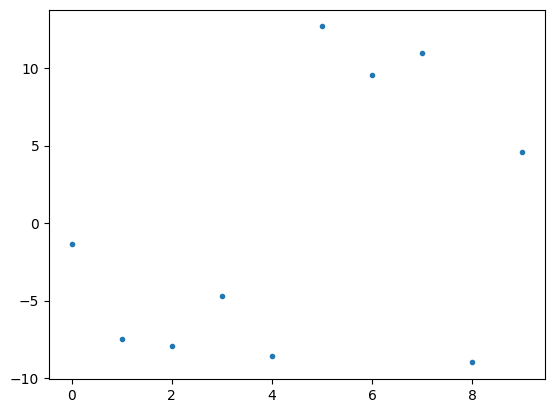

In [ ]:
plt.plot(y,'.')

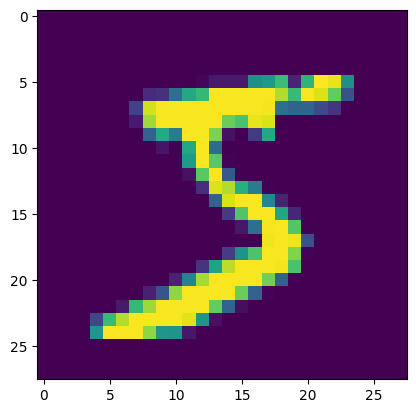

In [ ]:
plt.imshow(x.reshape(28,28))

In [27]:
X.shape

(60000, 1, 28, 28)

In [28]:
X.shape[0]

60000

In [29]:
X.shape[2]*X.shape[3]

784

In [30]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [35]:
X.shape

(60000, 784)

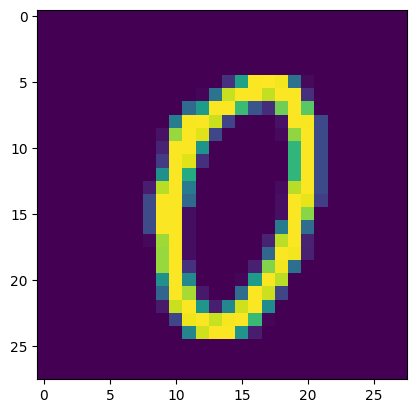

In [36]:
plt.imshow(X[1000,:].reshape(28,28))

In [37]:
Y[1000]

0

In [ ]:
x = X[0:2,:]

In [ ]:
x.shape

(2, 784)

In [ ]:
x = x.T

In [ ]:
m.shape,x.shape

((10, 784), (784, 2))

In [ ]:
y = m@x

In [ ]:
y

In [ ]:
np.max(y, axis=0)

array([12.6962935 ,  8.84688322])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
Y[0:2]

array([5, 0])

In [ ]:
y_ans = Y[0:2] 

In [ ]:
y_ans

array([5, 0])

In [ ]:
y

array([5, 9])

In [ ]:
np.sum((y == y_ans))/len(y)

0.5

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y_ans = Y

In [ ]:
acc = np.sum(y == y_ans)/len(Y)

In [ ]:
acc

0.06776666666666667

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.0654


In [ ]:
m_best = 0 
acc_best = 0

for i in range(1000):
    
    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
def scale(img):
    img_min = torch.min(img)
    img_max = torch.max(img)
    scaled = (img - img_min) / (img_max - img_min) * 1.0
    return scaled

In [ ]:
X = scale(X)
X_test = scale(X_test)

In [ ]:
m_best = 0 
acc_best = 0

for i in range(10000):
    
    m = m_best  + 0.0000000001*GPU_data(np.random.rand(10,784))

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

In [ ]:
for i in range(1000000):
    
    m = m_best  + 0.000000001*GPU_data(np.random.standard_normal((10,784)))

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1) 
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

In [ ]:
N = 100
M = GPU_data(np.random.random((N,10,784)))

m_best = 0 
acc_best = 0

for i in range(10000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[1:] += 0.0000001*GPU_data(np.random.random((N-1,10,784)))

    acc = score[s][0].item()

    if acc > acc_best:
        print(acc)
        m_best = M[0]
        acc_best = acc

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0 
acc_best = 0

for i in range(1000000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2:] = 0
    M[1:] += 0.00000000001*GPU_data(np.random.rand(N-1,10,784))
    

    acc = score[s][0].item()

    if acc > acc_best:
        
        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.22193333506584167
76 0.22351667284965515
77 0.22750000655651093
78 0.26213333010673523
79 0.2739666700363159
80 0.2819499969482422
81 0.31246668100357056
82 0.3299500048160553
83 0.34601667523384094
84 0.35678333044052124
85 0.37139999866485596
86 0.3848166763782501
87 0.3948333263397217
88 0.3976166844367981
89 0.40316668152809143
90 0.40913334488868713
91 0.4165833294391632
92 0.4217666685581207
93 0.4284333288669586
94 0.43301665782928467
95 0.4457666575908661
96 0.4494999945163727
97 0.4524500072002411
98 0.45376667380332947
99 0.4548666775226593
100 0.45651668310165405
101 0.46183332800865173
102 0.4624499976634979
103 0.4661666750907898
104 0.4676666855812073
105 0.4742000102996826
106 0.4752666652202606
107 0.4759666621685028
108 0.4784833490848541
109 0.48144999146461487
110 0.48456665873527527
111 0.4896000027656555
112 0.49121665954589844
113 0.4943833351135254
114 0.49514999985694885
115 0.49691668152809143
116 0.4992833435535431
117 0.5045999884605408
118 0.506033360958

KeyboardInterrupt: ignored

In [ ]:
y_test = torch.argmax((M@X_test), axis=1) 
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
acc_test

0.8894999623298645

# Bias

In [ ]:
X.shape

torch.Size([784, 60000])

In [ ]:
bias = GPU_data(np.ones((1,X.shape[1])))

In [ ]:
bias.shape

torch.Size([1, 60000])

In [ ]:
X = torch.concatenate([bias,X])

In [ ]:
X.shape

torch.Size([785, 60000])

(array([65026.,  1022.,   833.,   716.,   798.,   816.,   746.,   836.,
         1063.,  6544.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

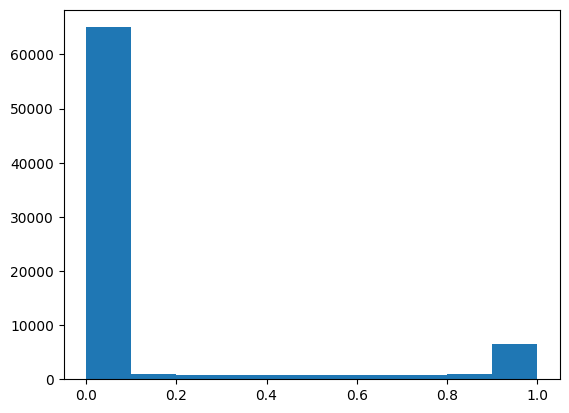

In [ ]:
plt.hist(X[1:,:100].flatten().cpu().numpy())

In [ ]:
N = 20
M = GPU_data(np.random.rand(N,10,785))

m_best = 0 
acc_best = 0

for i in range(1000000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2:] = 0
    M[1:] += GPU_data(np.random.rand(N-1,10,785))

    # M = torch.tanh(M)
    

    acc = score[s][0].item()

    if acc > acc_best:
        
        m_best = M[0]
        acc_best = acc

        print(i,acc)

In [ ]:
bias = GPU_data(np.ones((1,X_test.shape[1])))

In [ ]:
X_test = torch.concatenate([bias,X_test])

In [ ]:
y_test = torch.argmax((M@X_test), axis=1) 
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()
acc_test

0.8932999968528748

In [ ]:
X.shape

torch.Size([785, 60000])

In [ ]:
M.shape

torch.Size([20, 10, 785])

In [40]:
plt.imshow(M[0,9,1:].reshape(28,28).cpu().numpy())

NameError: ignored

In [ ]:
X.shape

torch.Size([785, 60000])

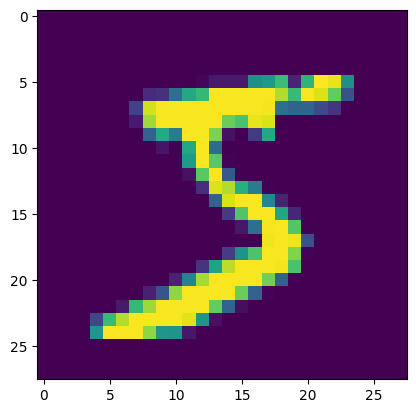

In [ ]:
plt.imshow(X[1:,0].reshape(28,28).cpu().numpy())

In [ ]:
N = 10
M = GPU_data(np.random.random((N,10,784)))

m_best = 0 
acc_best = 0

for i in range(10000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2] = 0
    M[1:] += 0.00001*GPU_data(np.random.random((N-1,10,784)))
    

    acc = score[s][0].item()

    if acc > acc_best:
        
        m_best = M[0]
        acc_best = acc

        ym = M@X
        ym = torch.argmax(ym, axis=1)
        ym = torch.mode(ym,0)[0]
        acc2 = (((ym == Y)).sum()/len(Y)).item()

        print(i,acc,acc2)

In [ ]:
m_best = 0 
acc_best = 0

for i in range(10000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2] = 0
    M[1:] += 0.00001*GPU_data(np.random.random((N-1,10,784)))
    

    acc = score[s][0].item()

    if acc > acc_best:
        print(i,acc)
        m_best = M[0]
        acc_best = acc

In [ ]:
ym = M@X
ym = torch.argmax(ym, axis=1)
ym = torch.mode(ym,0)[0]
acc = ((ym == Y)).sum()/len(Y)
acc

tensor(0.8164, device='cuda:0')

In [67]:
%%capture
pip install wandb

In [68]:
import wandb as wb

In [ ]:
for n in range(100):

    wb.init(project="MNIST Random Walk 10000 d")#,entity="mathdatasci-2023"
    c = wb.config

    c.h = 0.00000001
    m_best = 0 
    acc_best = 0

    for i in range(10000):
        
        m = m_best  + c.h*GPU_data(np.random.standard_normal((10,784)))

        y = m@X

        y = torch.argmax(y, axis=0)

        acc = ((y == Y)).sum()/len(Y)

        if acc > acc_best:
            m_best = m
            acc_best = acc

        wb.log({"acc_best": acc_best})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [64]:
X.shape

(60000, 784)

In [63]:
N = 10

M = GPU_data(torch.zeros((N,10,784)))

for n in range(N):

    wb.init(project="MNIST Random Walk 10000 h")#,entity="mathdatasci-2023"
    c = wb.config

    c.h = 0.01
    m_best = 0 
    acc_best = 0

    for i in range(10000):
        
        m = m_best  + c.h*GPU_data(np.random.standard_normal((10,784)))

        y = m@X[:,:1000]

        y = torch.argmax(y, axis=0)

        acc = ((y == Y[:1000])).sum()/len(Y[:1000])

        

        if acc > acc_best:
            m_best = m
            acc_best = acc

        wb.log({"acc_best": acc_best})

    M[n] = m_best

NameError: ignored

In [62]:
M.shape
X.shape
ym = M@X
ym.shape
ym = torch.argmax(ym, axis=1)
ym.shape
ym = torch.mode(ym,0)[0]
acc = ((ym == Y)).sum()/len(Y)
acc
ym

NameError: ignored

In [61]:
N = 100

M = GPU_data(torch.zeros((N,10,784)))

for n in range(N):

    m_best = 0 
    acc_best = 0

    for i in range(1000):
        
        m = m_best  + 0.001*GPU_data(np.random.standard_normal((10,784)))

        y = m@X

        y = torch.argmax(y, axis=0)

        acc = ((y == Y)).sum()/len(Y)


        if acc > acc_best:
            
            m_best = m
            acc_best = acc

    print(acc.item())
    M[n] = m_best

    if n > 2:
        ym = M[:n]@X
        ym = torch.argmax(ym, axis=1)
        ym = torch.mode(ym,0)[0]
        acc = ((ym == Y)).sum()/len(Y)
        print("Swarm: ",acc.item())

NameError: ignored

In [ ]:
########################################

In [60]:
N = 100

M = GPU_data(torch.zeros((N,10,784)))

for n in range(N):

    m_best = 0 
    acc_best = 0

    for i in range(10000):
        
        m = m_best  + 0.001*GPU_data(np.random.standard_normal((10,784)))

        y = m@X[:,:1000]

        y = torch.argmax(y, axis=0)

        acc = ((y == Y[:1000])).sum()/len(Y[:1000])


        if acc > acc_best:
            m_best = m
            acc_best = acc

    print(acc_best.item())
    M[n] = m_best

    if n > 2:
        ym = M[:n]@X
        ym = torch.argmax(ym, axis=1)
        ym = torch.mode(ym,0)[0]
        acc = ((ym == Y)).sum()/len(Y)
        print("Swarm: ",acc.item())

NameError: ignored

In [59]:
###################

In [58]:
n = 100

M = GPU_data(np.random.standard_normal((n,10,784)))

y = M@X

y = torch.argmax(y, axis=0)

ym = torch.mode(ym,0)[0]

acc = ((y == Y)).sum()/len(Y)

NameError: ignored

In [ ]:
acc

In [57]:
n = 100

M = GPU_data(np.random.standard_normal((n,10,784)))

M_best = 0 
acc_best = 0

for i in range(10000):
    
    M = M_best  + 0.01*GPU_data(np.random.standard_normal((n,10,784)))

    y = M@X

    y = torch.argmax(y, axis=1)

    y = torch.mode(y,0)[0]

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        M_best = M
        acc_best = acc
        print(acc_best.item())


NameError: ignored

In [56]:
y=M@X

NameError: ignored

In [55]:
y.shape

NameError: ignored

In [ ]:
###

In [54]:
def train():

    m_best = 0 
    acc_best = 0

    for i in range(1000):
        
        m = m_best  + 0.001*GPU_data(np.random.standard_normal((10,784)))

        y = m@X

        y = torch.argmax(y, axis=0)

        acc = ((y == Y)).sum()/len(Y)


        if acc > acc_best:
            m_best = m
            acc_best = acc

    return acc_best,m_best

In [53]:
acc_best,m_best = train()
acc_best.item()

NameError: ignored

In [52]:
n = 10

M = GPU_data(np.random.standard_normal((n,10,784)))

for i in range(n):
    print(i)
    
    acc_best,m_best = train()

    M[i] = m_best

NameError: ignored

In [51]:
y = M@X

y = torch.argmax(y, axis=1)

y = torch.mode(y,0)[0]

acc = ((y == Y)).sum()/len(Y)

NameError: ignored

In [ ]:
acc

In [50]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [49]:
def R(s):
    # return np.random.standard_normal(s)
    return Truncated_Normal(s)

In [48]:
def a(x):
    return torch.tanh(x)

In [47]:
def f(x):
    return a(w2@a(w1@a(w0@x)))

In [46]:
N_in = 784
N_out = 10
N_hidden = 100

In [45]:
w0 = GPU(R((N_hidden,N_in)))
w1 = GPU(R((N_hidden,N_hidden)))
w2 = GPU(R((N_out,N_hidden)))
y = f(X)
y = torch.argmax(y, axis=0)

acc = ((y == Y)).sum()/len(Y)
acc

NameError: ignored

In [44]:
# w0_best = 0
# w1_best = 0
# w2_best = 0

acc_best = 0

s = 0.001

c = 0

for i in range(100000):

    dw0 = s*GPU(R((N_hidden,N_in)))
    dw1 = s*GPU(R((N_hidden,N_hidden)))
    dw2 = s*GPU(R((N_out,N_hidden)))

    w0 = w0_best  + dw0
    w1 = w1_best  + dw1
    w2 = w2_best  + dw2

    y = f(X)

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)

    c += 1

    if c > 10:
        s = 0.999*s

    if acc > acc_best:
        print(s,acc.item())
        w0_best  = w0
        w1_best  = w1
        w2_best  = w2
        acc_best = acc

        c = 0 
        s = 1.1*s

NameError: ignored

In [43]:
N_in = 784
N_out = 10
N_hidden = 100

w0_best = 0
w1_best = 0
w2_best = 0

acc_best = 0

s = 0.001

for i in range(10000000):

    dw0 = s*GPU(R((N_hidden,N_in)))
    dw1 = s*GPU(R((N_hidden,N_hidden)))
    dw2 = s*GPU(R((N_out,N_hidden)))

    w0 = w0_best  + dw0
    w1 = w1_best  + dw1
    w2 = w2_best  + dw2

    y = f(X)

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)

    if acc > acc_best:
        print(acc.item())
        w0_best  = w0
        w1_best  = w1
        w2_best  = w2
        acc_best = acc


NameError: ignored

In [41]:
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * exp(-k*t)
   return lrate